<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [6]:
movies = pd.read_csv('./data/imdb_1000.csv', encoding='utf8')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [7]:
movies.shape

(979, 6)

#### Check the data type of each column.

In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [9]:
round(movies.duration.mean())

121.0

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [10]:
movies.sort_values('duration').head()
#shortest Movie: Freaks

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."


In [11]:
movies.sort_values('duration', ascending=False).head()
#Longest Movie: Hamlet

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110b520f0>]],
      dtype=object)

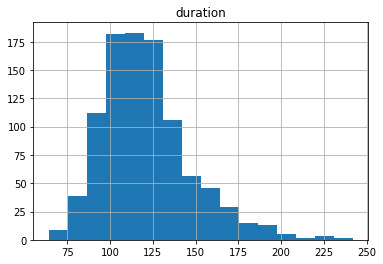

In [12]:
movies.hist(column='duration',bins=16)

#### Use a box plot to display that same data.

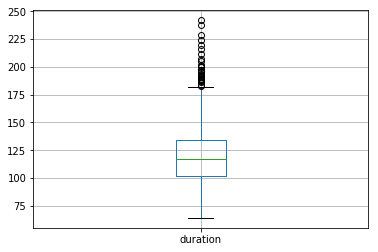

In [13]:
movies.boxplot(column='duration')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [14]:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0,0.5,'content rating')

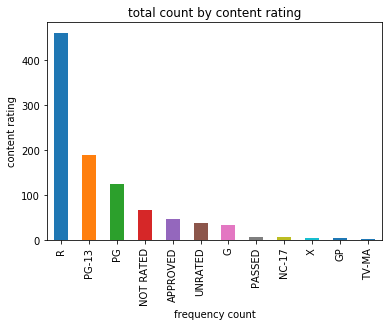

In [15]:
A = movies.content_rating.value_counts().plot(kind='bar', title='total count by content rating', x='frequency count', y='content rating')
A.set_xlabel("frequency count")
A.set_ylabel("content rating")

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [16]:
#before remapping
movies.groupby('content_rating').genre.count()

content_rating
APPROVED      47
G             32
GP             3
NC-17          7
NOT RATED     65
PASSED         7
PG           123
PG-13        189
R            460
TV-MA          1
UNRATED       38
X              4
Name: genre, dtype: int64

In [17]:
movies['content_rating']=movies['content_rating'].replace(({'NOT RATED': 'UNRATED', 'APPROVED': 'UNRATED', 'PASSED': 'UNRATED','GP': 'UNRATED',}))

In [18]:
#after remapping
movies.groupby('content_rating').genre.count()

content_rating
G           32
NC-17        7
PG         123
PG-13      189
R          460
TV-MA        1
UNRATED    160
X            4
Name: genre, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [19]:
#before remapping
movies.groupby('content_rating').genre.count()

content_rating
G           32
NC-17        7
PG         123
PG-13      189
R          460
TV-MA        1
UNRATED    160
X            4
Name: genre, dtype: int64

In [20]:
movies['content_rating'] = movies['content_rating'].replace(({'X': 'NC-17', 'TV-MA': 'NC-17'}))

In [21]:
#after remapping
movies.groupby('content_rating').genre.count()

content_rating
G           32
NC-17       12
PG         123
PG-13      189
R          460
UNRATED    160
Name: genre, dtype: int64

#### Count the number of missing values in each column.

In [22]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [23]:
movies.content_rating.fillna(value='NA', inplace=True)

In [24]:
#check that the 3 missing values are no longer missing
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [25]:
is_long = movies.duration>=120
is_long

movies.head()
movies[is_long].sort_values(by='duration').head()
x = movies[is_long].star_rating.mean()
x

7.948898678414097

In [26]:
is_short = movies.duration<120
is_short

movies.head()
movies[is_short].sort_values(by='duration').head()
x1 = movies[is_short].star_rating.mean()
x1

7.838666666666665

In [27]:
x-x1

0.11023201174743225

#### Use a visualization to detect whether there is a relationship between duration and star rating.

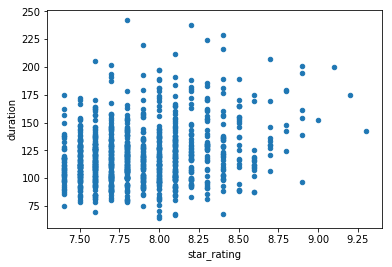

In [28]:
#no relationship between duration and star_rating
movies.plot.scatter(y='duration',x='star_rating')

#### Calculate the average duration for each genre.

In [29]:
round(movies.groupby('genre').duration.mean())

genre
Action       126.0
Adventure    135.0
Animation     97.0
Biography    132.0
Comedy       108.0
Crime        122.0
Drama        127.0
Family       108.0
Fantasy      112.0
Film-Noir     97.0
History       66.0
Horror       103.0
Mystery      116.0
Sci-Fi       109.0
Thriller     114.0
Western      137.0
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

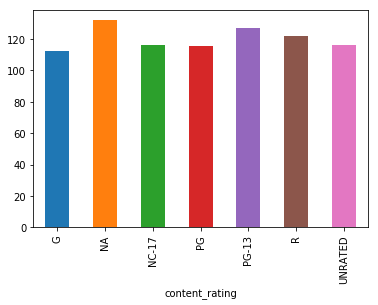

In [30]:
movies.groupby('content_rating').duration.mean().plot(kind='bar')

#### Determine the top rated movie (by star rating) for each genre.

In [31]:
movies.sort_values('star_rating', ascending=False).groupby('genre').first()

,star_rating,title,content_rating,duration,actors_list
genre,,,,,
Action,9.0,The Dark Knight,PG-13,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
Adventure,8.9,The Lord of the Rings: The Return of the King,PG-13,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
Animation,8.6,Spirited Away,PG,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
Biography,8.9,Schindler's List,R,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
Comedy,8.6,Modern Times,G,87,"[u'Charles Chaplin', u'Paulette Goddard', u'He..."
Crime,9.3,The Shawshank Redemption,R,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
Drama,8.9,12 Angry Men,UNRATED,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
Family,7.9,E.T. the Extra-Terrestrial,PG,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
Fantasy,7.7,The City of Lost Children,R,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."


In [32]:
#check max value for each movie coincides with the first movie indicated above
movies.groupby('genre').star_rating.max()

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [33]:
mask = movies.duplicated(subset='title',keep=False)
movies[mask].sort_values(by='title')

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,NA,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [34]:
mask1 = movies.duplicated(subset=['title','actors_list'],keep=False)
movies[mask1].sort_values(by='title')
#Nil results. Hence, the multiple movies with same title are not exactly duplicates, as the actors list are different.

,star_rating,title,content_rating,genre,duration,actors_list


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [35]:
genre_list = movies.groupby('genre').genre.count()
genre_list

genre
Action       136
Adventure     75
Animation     62
Biography     77
Comedy       156
Crime        124
Drama        278
Family         2
Fantasy        1
Film-Noir      3
History        1
Horror        29
Mystery       16
Sci-Fi         5
Thriller       5
Western        9
Name: genre, dtype: int64

In [37]:
genre_list = movies.groupby('genre').genre.count()>=10

In [38]:
movies.groupby('genre').star_rating.mean().round(2).loc[genre_list]

genre
Action       7.88
Adventure    7.93
Animation    7.91
Biography    7.86
Comedy       7.82
Crime        7.92
Drama        7.90
Horror       7.81
Mystery      7.98
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [41]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [42]:
genre_value_count = movies.genre.value_counts()>=10
genre_value_count

Drama         True
Comedy        True
Action        True
Crime         True
Biography     True
Adventure     True
Animation     True
Horror        True
Mystery       True
Western      False
Sci-Fi       False
Thriller     False
Film-Noir    False
Family       False
Fantasy      False
History      False
Name: genre, dtype: bool

In [43]:
movies.groupby('genre').star_rating.mean().round(2).loc[genre_value_count]

genre
Action       7.88
Adventure    7.93
Animation    7.91
Biography    7.86
Comedy       7.82
Crime        7.92
Drama        7.90
Horror       7.81
Mystery      7.98
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [45]:
movies.groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Family       7.850000
Fantasy      7.700000
Film-Noir    8.033333
History      8.000000
Horror       7.806897
Mystery      7.975000
Sci-Fi       7.920000
Thriller     7.680000
Western      8.255556
Name: star_rating, dtype: float64

In [46]:
#Assume that star rating above 8 is considered high
is_high = movies.groupby('genre').star_rating.mean()>8
is_high

genre
Action       False
Adventure    False
Animation    False
Biography    False
Comedy       False
Crime        False
Drama        False
Family       False
Fantasy      False
Film-Noir     True
History      False
Horror       False
Mystery      False
Sci-Fi       False
Thriller     False
Western       True
Name: star_rating, dtype: bool

In [47]:
movies.groupby('genre').star_rating.mean().round(2).loc[is_high]

genre
Film-Noir    8.03
Western      8.26
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [54]:
movies.groupby('genre').star_rating.agg(['count', 'mean'])

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Family,2,7.850000
Fantasy,1,7.700000


In [55]:
movies.groupby('genre').star_rating.agg('count')>=10

genre
Action        True
Adventure     True
Animation     True
Biography     True
Comedy        True
Crime         True
Drama         True
Family       False
Fantasy      False
Film-Noir    False
History      False
Horror        True
Mystery       True
Sci-Fi       False
Thriller     False
Western      False
Name: star_rating, dtype: bool

In [56]:
filter4= movies.groupby('genre').star_rating.agg('count')>=10
filter4

genre
Action        True
Adventure     True
Animation     True
Biography     True
Comedy        True
Crime         True
Drama         True
Family       False
Fantasy      False
Film-Noir    False
History      False
Horror        True
Mystery       True
Sci-Fi       False
Thriller     False
Western      False
Name: star_rating, dtype: bool

In [57]:
movies.groupby('genre').star_rating.mean().round(2).loc[filter4]

genre
Action       7.88
Adventure    7.93
Animation    7.91
Biography    7.86
Comedy       7.82
Crime        7.92
Drama        7.90
Horror       7.81
Mystery      7.98
Name: star_rating, dtype: float64

## Bonus

#### Figure out something "interesting" using the actors data!

In [ ]:
#Interested to find out the actor who casted the most in the list of movies
#The actor who casted in most movies is Robert De Niro

In [71]:
#apply eval to return the string into its original state - list
a = eval(movies.actors_list[0])
a
b = eval(movies.actors_list[1])
b
a+b

['Tim Robbins',
 'Morgan Freeman',
 'Bob Gunton',
 'Marlon Brando',
 'Al Pacino',
 'James Caan']

In [70]:
type(movies.actors_list[0])
type(eval(movies.actors_list[0]))

list

In [67]:
#converted all rows from string into a list
new_actor_list=[]
for i in movies.actors_list:
    new_actor_list+=eval(i)
print(new_actor_list)

['Tim Robbins', 'Morgan Freeman', 'Bob Gunton', 'Marlon Brando', 'Al Pacino', 'James Caan', 'Al Pacino', 'Robert De Niro', 'Robert Duvall', 'Christian Bale', 'Heath Ledger', 'Aaron Eckhart', 'John Travolta', 'Uma Thurman', 'Samuel L. Jackson', 'Henry Fonda', 'Lee J. Cobb', 'Martin Balsam', 'Clint Eastwood', 'Eli Wallach', 'Lee Van Cleef', 'Elijah Wood', 'Viggo Mortensen', 'Ian McKellen', 'Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley', 'Brad Pitt', 'Edward Norton', 'Helena Bonham Carter', 'Elijah Wood', 'Ian McKellen', 'Orlando Bloom', 'Leonardo DiCaprio', 'Joseph Gordon-Levitt', 'Ellen Page', 'Mark Hamill', 'Harrison Ford', 'Carrie Fisher', 'Tom Hanks', 'Robin Wright', 'Gary Sinise', 'Elijah Wood', 'Ian McKellen', 'Viggo Mortensen', 'Matthew McConaughey', 'Anne Hathaway', 'Jessica Chastain', 'Jack Nicholson', 'Louise Fletcher', 'Michael Berryman', 'Toshirô Mifune', 'Takashi Shimura', 'Keiko Tsushima', 'Robert De Niro', 'Ray Liotta', 'Joe Pesci', 'Mark Hamill', 'Harrison Ford', 'Carrie 

In [85]:
#Count the occurences by actor
from collections import Counter
a = dict(Counter(new_actor_list))
a

{'Tim Robbins': 5,
 'Morgan Freeman': 8,
 'Bob Gunton': 1,
 'Marlon Brando': 4,
 'Al Pacino': 13,
 'James Caan': 2,
 'Robert De Niro': 18,
 'Robert Duvall': 7,
 'Christian Bale': 11,
 'Heath Ledger': 2,
 'Aaron Eckhart': 2,
 'John Travolta': 1,
 'Uma Thurman': 5,
 'Samuel L. Jackson': 6,
 'Henry Fonda': 3,
 'Lee J. Cobb': 2,
 'Martin Balsam': 1,
 'Clint Eastwood': 14,
 'Eli Wallach': 1,
 'Lee Van Cleef': 2,
 'Elijah Wood': 5,
 'Viggo Mortensen': 4,
 'Ian McKellen': 8,
 'Liam Neeson': 5,
 'Ralph Fiennes': 7,
 'Ben Kingsley': 4,
 'Brad Pitt': 14,
 'Edward Norton': 7,
 'Helena Bonham Carter': 4,
 'Orlando Bloom': 2,
 'Leonardo DiCaprio': 11,
 'Joseph Gordon-Levitt': 6,
 'Ellen Page': 2,
 'Mark Hamill': 3,
 'Harrison Ford': 10,
 'Carrie Fisher': 4,
 'Tom Hanks': 14,
 'Robin Wright': 3,
 'Gary Sinise': 2,
 'Matthew McConaughey': 4,
 'Anne Hathaway': 3,
 'Jessica Chastain': 3,
 'Jack Nicholson': 9,
 'Louise Fletcher': 1,
 'Michael Berryman': 1,
 'Toshirô Mifune': 3,
 'Takashi Shimura': 2,
 '

In [84]:
#sort the values of dictionary a by descending order
from operator import itemgetter
sorted(a.items(), key=itemgetter(1), reverse=True)

[('Robert De Niro', 18),
 ('Clint Eastwood', 14),
 ('Brad Pitt', 14),
 ('Tom Hanks', 14),
 ('Al Pacino', 13),
 ('Johnny Depp', 12),
 ('Christian Bale', 11),
 ('Leonardo DiCaprio', 11),
 ('Dustin Hoffman', 11),
 ('Harrison Ford', 10),
 ('James Stewart', 10),
 ('Julianne Moore', 10),
 ('Denzel Washington', 10),
 ('Jack Nicholson', 9),
 ('Russell Crowe', 9),
 ('Sean Connery', 9),
 ('Ed Harris', 9),
 ('Ethan Hawke', 9),
 ('Morgan Freeman', 8),
 ('Ian McKellen', 8),
 ('Matt Damon', 8),
 ('Cary Grant', 8),
 ('Kate Winslet', 8),
 ('Michael Caine', 8),
 ('Bruce Willis', 8),
 ('Robert Downey Jr.', 8),
 ('Jake Gyllenhaal', 8),
 ('Tom Cruise', 8),
 ('Sean Penn', 8),
 ('Robert Duvall', 7),
 ('Ralph Fiennes', 7),
 ('Edward Norton', 7),
 ('Humphrey Bogart', 7),
 ('Scarlett Johansson', 7),
 ('Jennifer Connelly', 7),
 ('Tony Chiu Wai Leung', 7),
 ('Daniel Radcliffe', 7),
 ('Emma Watson', 7),
 ('Rupert Grint', 7),
 ('Geoffrey Rush', 7),
 ('Cate Blanchett', 7),
 ('Meryl Streep', 7),
 ('Samuel L. Jackson